# Aplicação de Cluster no Dataset MAFAULDA

In [1]:
library(tidyverse)
library(dbscan)
library(umap)
set.seed(12)

-- Attaching core tidyverse packages ------------------------ tidyverse 2.0.0 --
v dplyr     1.1.4     v readr     2.1.5
v forcats   1.0.0     v stringr   1.5.1
v ggplot2   3.5.1     v tibble    3.2.1
v lubridate 1.9.4     v tidyr     1.3.1
v purrr     1.0.2     
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
i Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: 'dbscan'


The following object is masked from 'package:stats':

    as.dendrogram




## Carrega os dados
Os dados são correspondentes aos harmônicos da série temporal do motor

In [2]:
dados <- read_csv('D:/share/motor_vibration_dataset.csv')

Rows: 709 Columns: 8257
-- Column specification --------------------------------------------------------
Delimiter: ","
chr    (1): file_name
dbl (8256): tachometer_harmonic_1_frequency, tachometer_harmonic_1, tachomet...

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.


## Limpa os dados
Os dados são limpos e os rótulos são divididos em duas colunas.

In [3]:
dados <- dados %>%
    select(file_name, contains('mean') ) %>%
    mutate(file_name = str_replace_all(file_name, pattern = '\\./motorvibration/Data/', replacement = '')) %>%
    mutate(file_name = str_replace_all(file_name, pattern = '/[0-9\\.]*.csv$', replacement = '')) %>%
    separate(file_name, c("type", 'un'), sep='/') %>%
    mutate(type = factor(type))

Warning message:
"Expected 2 pieces. Missing pieces filled with `NA` in 49 rows [287, 288, 289,
290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305,
306, ...]."


In [4]:
dados %>% group_by (type) %>% summarise(Total=n())

type,Total
<fct>,<int>
horizontal-misalignment,147
imbalance,139
normal,49
overhang-ball_fault,88
underhang-ball_fault,136
vertical-misalignment,150


## Redução de dimensão
Para evitar o excesso de outliers o algoritmo UMAP para redução de dimensões foi utilizado.

# Uniform Manifold Approximation and Projection (UMAP) - Descrição do ChatGTP

## Introdução

O **UMAP** é um algoritmo de redução de dimensionalidade amplamente utilizado em aprendizado de máquina e visualização de dados. Foi introduzido por *Leland McInnes* e *John Healy* em 2018 e é baseado em princípios de geometria diferencial e teoria dos grafos.

O objetivo principal do UMAP é projetar dados de alta dimensionalidade em um espaço de menor dimensão, preservando ao máximo as estruturas locais e globais do conjunto original.

---

## Fundamentos Matemáticos

O UMAP utiliza conceitos de:

1. **Geometria Diferencial**: Define uma métrica Riemanniana nos dados para modelar sua estrutura local.
2. **Teoria de Grafos**: Constrói um grafo baseado em vizinhos próximos para capturar relações locais.
3. **Topologia Algébrica**: Relaciona a estrutura de alta dimensão ao grafo resultante.

### Etapas do Algoritmo

1. **Construção do Grafo de Similaridade**:
   - Cada ponto no espaço original é considerado como um nó no grafo.
   - Define-se um conjunto de vizinhos próximos usando a métrica **k-nearest neighbors (k-NN)**.
   - Uma função de afinidade (ou probabilidade) é atribuída às arestas do grafo para medir a similaridade entre pontos.

2. **Redução de Dimensionalidade**:
   - O grafo de alta dimensão é aproximado em um espaço de menor dimensão.
   - A otimização é feita através da minimização de uma **função de perda** que compara a estrutura dos grafos nos dois espaços (original e reduzido).

---

## Principais Características

- **Preservação de Estruturas Locais**: UMAP prioriza manter vizinhanças próximas no espaço reduzido.
- **Flexibilidade**: Suporta dados de diferentes métricas de distância, como Euclidiana, Manhattan, entre outras.
- **Velocidade**: É mais rápido que algoritmos como o t-SNE para grandes conjuntos de dados.
- **Parâmetros Importantes**:
  - *n_neighbors*: Controla o tamanho da vizinhança local.
  - *min_dist*: Define a distância mínima entre os pontos no espaço reduzido.
  - *metric*: Métrica de distância usada.

---

## Comparação com t-SNE

| Aspecto                  | UMAP                        | t-SNE                       |
|--------------------------|-----------------------------|-----------------------------|
| **Tempo de execução**     | Mais rápido                | Mais lento                  |
| **Escalabilidade**        | Melhor                     | Menor                       |
| **Preservação Global**    | Melhor equilíbrio global   | Focado em estruturas locais |
| **Parâmetros**            | Mais configuráveis         | Menos configuráveis         |

---

## Aplicações

- **Visualização de Dados**: Exploração de conjuntos de dados de alta dimensionalidade, como embeddings de redes neurais.
- **Pré-processamento**: Redução de dimensionalidade antes de aplicar algoritmos de aprendizado supervisionado ou não supervisionado.
- **Análise de Dados de Genômica**: Em bioinformática para análise de expressão gênica.
- **Processamento de Linguagem Natural**: Redução de embeddings de palavras ou frases.

In [5]:
custom.settings = umap.defaults
custom.settings$n_neighbors = 10
custom.settings$metric = 'manhattan'
custom.settings$n_epochs = 5000
#custom.settings$min_dist= 0.0001
#custom.settings$n_components = 2

In [6]:
dados.umap_scale <- umap(
    scale(dados[,3:dim(dados)[2]]), config=custom.settings)
dados.umap <- umap(
    dados[,3:dim(dados)[2]], config=custom.settings)

In [7]:
summary(dados.umap$layout)

       V1                 V2          
 Min.   :-4.83750   Min.   :-8.28021  
 1st Qu.:-2.10114   1st Qu.:-2.79757  
 Median : 0.06392   Median :-0.00139  
 Mean   : 0.00000   Mean   : 0.00000  
 3rd Qu.: 2.07477   3rd Qu.: 3.22501  
 Max.   : 4.31574   Max.   : 7.56972  

In [8]:
summary(dados.umap_scale$layout)

       V1                 V2          
 Min.   :-2.95593   Min.   :-3.74421  
 1st Qu.:-1.23385   1st Qu.:-1.47891  
 Median : 0.09719   Median : 0.05858  
 Mean   : 0.00000   Mean   : 0.00000  
 3rd Qu.: 1.24282   3rd Qu.: 1.41013  
 Max.   : 2.62497   Max.   : 3.88064  

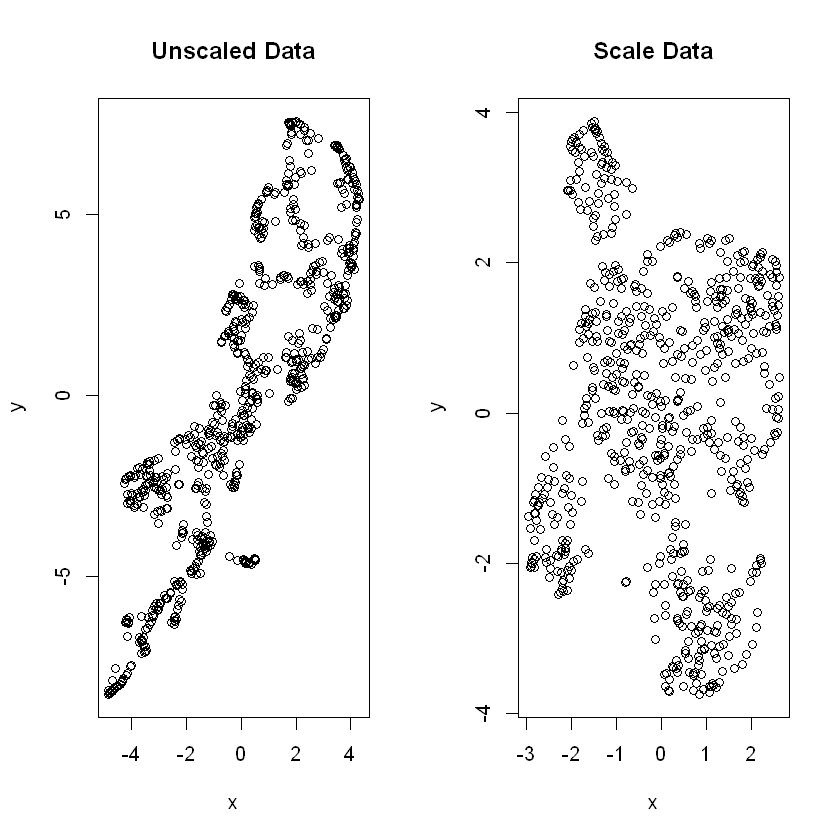

In [9]:
#options(repr.plot.width = 1, repr.plot.height = 0.75)
par(mfrow = c(1, 2))
plot(dados.umap$layout, xlab='x', ylab='y', main="Unscaled Data" )
plot(dados.umap_scale$layout, xlab='x', ylab='y', main="Scale Data" )
par(mfrow = c(1, 1))

In [10]:
dados2d <- cbind(dados[,1:2], as_tibble(dados.umap$layout), as_tibble(dados.umap_scale$layout))
colnames(dados2d) <- c('type', 'un', 'x_unscale', 'y_unscale', 'x_scale', 'y_scale')

Warning message:
"The `x` argument of `as_tibble.matrix()` must have unique column names if
`.name_repair` is omitted as of tibble 2.0.0.
i Using compatibility `.name_repair`."


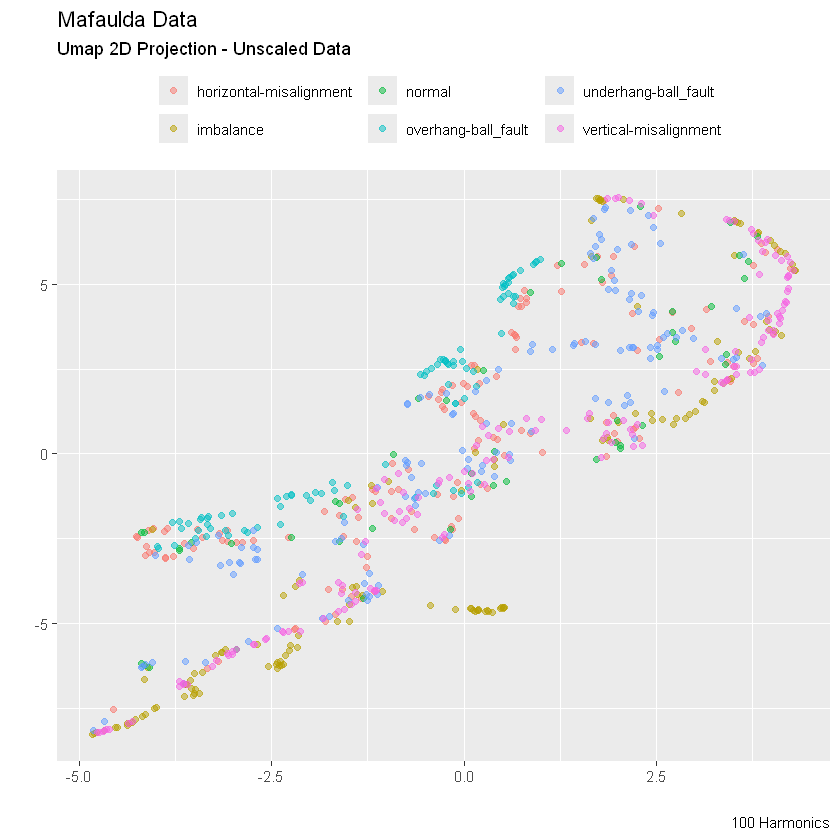

In [11]:
plt1 <- dados2d %>%
    ggplot(aes(x=x_unscale, y=y_unscale, color=type)) +
    geom_point(alpha=0.5) +
    theme(legend.position = 'top') +
    labs(title='Mafaulda Data', subtitle = 'Umap 2D Projection - Unscaled Data', caption = '100 Harmonics') +
    xlab('') +
    ylab('') + theme(legend.title=element_blank())
print(plt1)

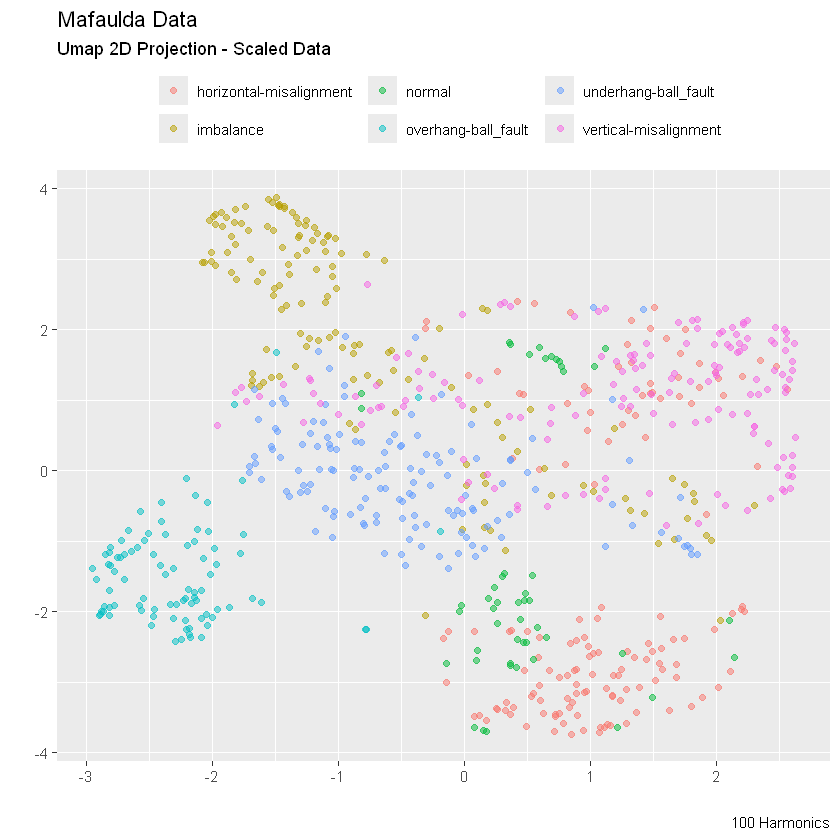

In [12]:
plt2 <- dados2d %>%
    ggplot(aes(x=x_scale, y=y_scale, color=type)) +
    geom_point(alpha=0.5) +
    theme(legend.position = 'top') +
    labs(title='Mafaulda Data', subtitle = 'Umap 2D Projection - Scaled Data', caption = '100 Harmonics') +
    xlab('') +
    ylab('') + theme(legend.title=element_blank())
print(plt2)

In [13]:
pdf("plots.pdf")
print(plt1)
print(plt2)
dev.off()

pdf 
  2

# HDBSCAN (Hierarchical Density-Based Spatial Clustering of Applications with Noise) - ChatGPT

## Introdução

O **HDBSCAN** é uma extensão do algoritmo **DBSCAN** que realiza clustering baseado em densidade, mas com melhorias significativas para lidar com conjuntos de dados complexos. Ele foi introduzido por *Campello, Moulavi e Sander* em 2013.

O HDBSCAN é projetado para encontrar clusters de forma hierárquica, eliminando a necessidade de definir um único parâmetro de densidade (como o `eps` no DBSCAN), tornando-o mais adaptável a dados com densidades variadas.

---

## Fundamentos Matemáticos

O HDBSCAN combina conceitos de:

1. **Clustering por Densidade**: Agrupa pontos densamente conectados e identifica regiões esparsas como ruído.
2. **Hierarquia**: Gera uma hierarquia de clusters baseada em uma abordagem de árvore.
3. **Persistência de Clusters**: Seleciona automaticamente os clusters mais "estáveis" ao longo da hierarquia.

### Principais Etapas do Algoritmo

1. **Conversão do Espaço de Dados**:
   - Calcula a **distância mútua** entre os pontos usando uma métrica (geralmente Euclidiana).
   - Transforma as distâncias em **distâncias mútua corrigidas** através de uma função de densidade local.

2. **Construção de MST (Minimum Spanning Tree)**:
   - O HDBSCAN utiliza um **grafo de vizinhanças** e gera uma **árvore geradora mínima (MST)** para conectar os pontos baseando-se nas distâncias ajustadas.

3. **Hierarquia de Clusters**:
   - Gera uma **hierarquia de clusters** eliminando sucessivamente as arestas mais "longas" da MST, dividindo o grafo em componentes conectados.
   - Cada nível da hierarquia representa diferentes densidades.

4. **Extração de Clusters Planos**:
   - Analisa a persistência (estabilidade) dos clusters ao longo da hierarquia.
   - Seleciona automaticamente os clusters mais estáveis, que representam melhor os dados.

5. **Identificação de Ruído**:
   - Pontos que não pertencem a nenhum cluster são identificados como **outliers**.

---

## Principais Características

- **Adaptativo**: Não exige que os clusters tenham densidades uniformes.
- **Robustez**: Pode identificar clusters de formas arbitrárias e lidar com ruído de maneira eficiente.
- **Automatização**: Seleciona automaticamente os parâmetros de densidade mais apropriados.
- **Hierarquia**: Fornece uma representação hierárquica dos clusters.
- **Escalabilidade**: Melhor desempenho em comparação com algoritmos hierárquicos tradicionais.

### Parâmetros Importantes

- *min_samples*: Número mínimo de pontos para definir a densidade local.
- *min_cluster_size*: Tamanho mínimo para considerar um grupo de pontos como cluster.
- *metric*: Métrica de distância usada (ex.: Euclidiana, Manhattan, etc.).

---

## Comparação com DBSCAN

| Aspecto                  | HDBSCAN                      | DBSCAN                      |
|--------------------------|------------------------------|-----------------------------|
| **Densidade Variável**    | Suporta densidades variáveis | Requer densidade uniforme   |
| **Parâmetros**            | Mais flexível               | Necessita definir `eps`     |
| **Hierarquia**            | Gera hierarquia de clusters | Não gera hierarquia         |
| **Identificação de Ruído**| Robusta                     | Funciona, mas menos adaptável|
| **Complexidade**          | Levemente maior             | Menor                       |

---

## Aplicações

- **Análise de Dados Espaciais**: Clustering em dados geográficos ou espaciais.
- **Detecção de Outliers**: Identificação de pontos atípicos em grandes conjuntos de dados.
- **Bioinformática**: Agrupamento de dados genéticos ou de expressão gênica.
- **Marketing e Segmentação**: Agrupamento de clientes com características similares.
- **Processamento de Linguagem Natural**: Clustering de embeddings de texto.

In [14]:
dados2d

type,un,x_unscale,y_unscale,x_scale,y_scale
<fct>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
horizontal-misalignment,1.0mm,-0.33723775,1.613480,0.94578955,-3.148889
horizontal-misalignment,1.0mm,-4.26293874,-2.445928,2.01332547,-3.078932
horizontal-misalignment,1.0mm,0.12766617,1.179956,2.10745630,-2.844757
horizontal-misalignment,1.0mm,-0.13587556,-1.248083,-0.12909977,-2.283915
horizontal-misalignment,1.0mm,1.21281255,5.551611,-0.16925287,-2.379327
horizontal-misalignment,1.0mm,-4.24925776,-2.450139,1.88686278,-3.214863
horizontal-misalignment,1.0mm,-4.03681315,-2.210977,1.98477798,-2.245605
horizontal-misalignment,1.0mm,-0.34205334,-1.181118,0.07878339,-2.277718
horizontal-misalignment,1.0mm,-3.40097082,-2.474443,0.99286139,-2.632495


In [15]:
d_analise <- dados2d %>% select(x_scale, y_scale)
cl <- hdbscan(d_analise, minPts = 9 )
cl

HDBSCAN clustering for 709 objects.
Parameters: minPts = 9
The clustering contains 2 cluster(s) and 20 noise points.

  0   1   2 
 20  77 612 

Available fields: cluster, minPts, coredist, cluster_scores,
                  membership_prob, outlier_scores, hc

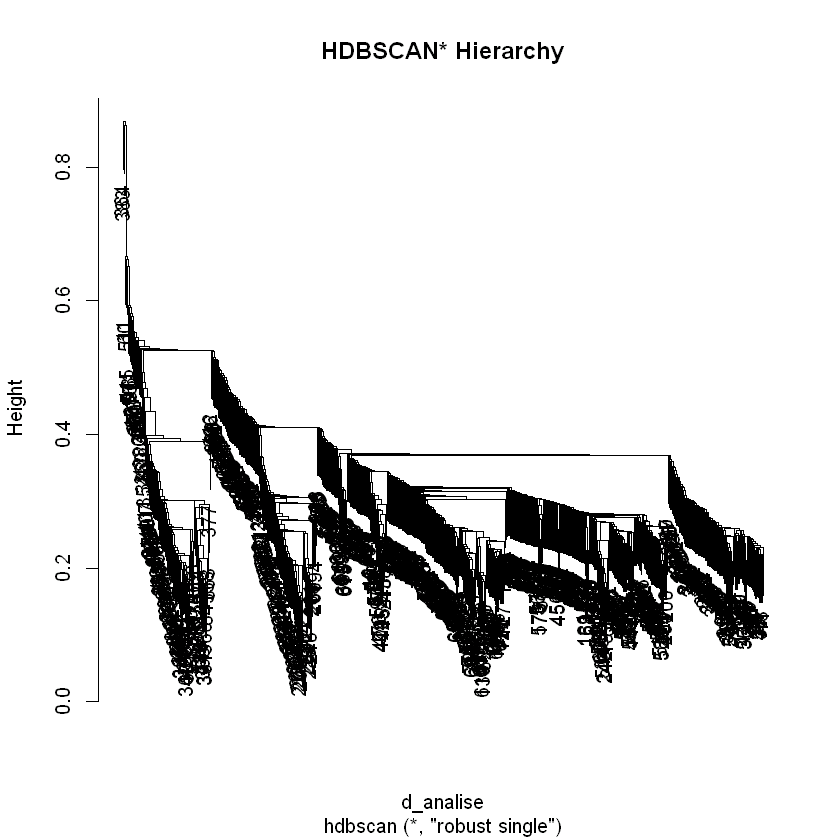

In [16]:
plot(cl$hc, main="HDBSCAN* Hierarchy")

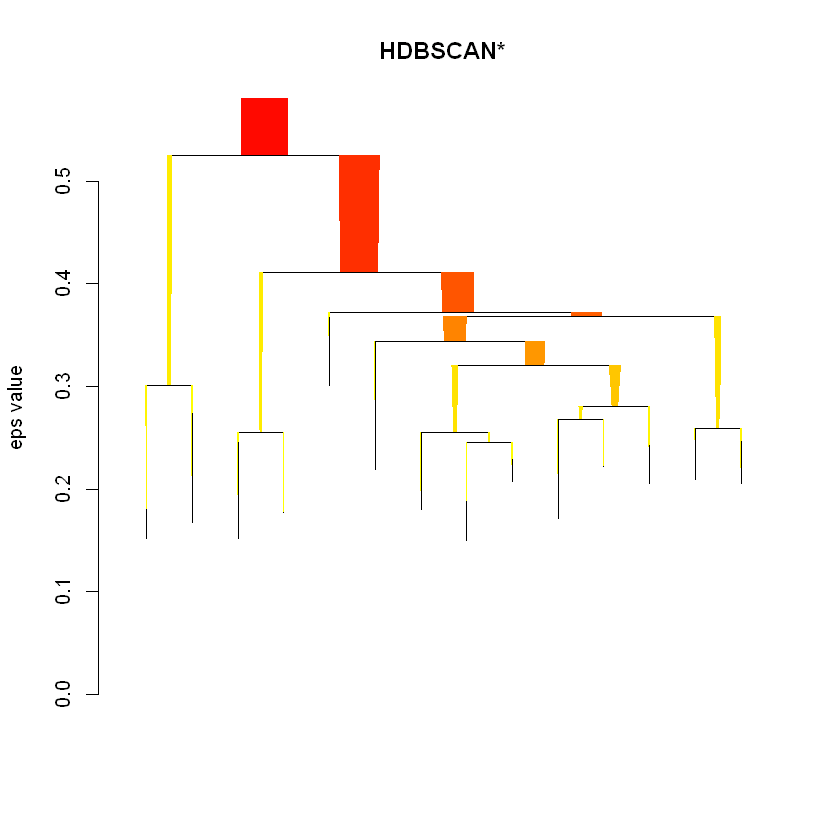

In [17]:
plot(cl)

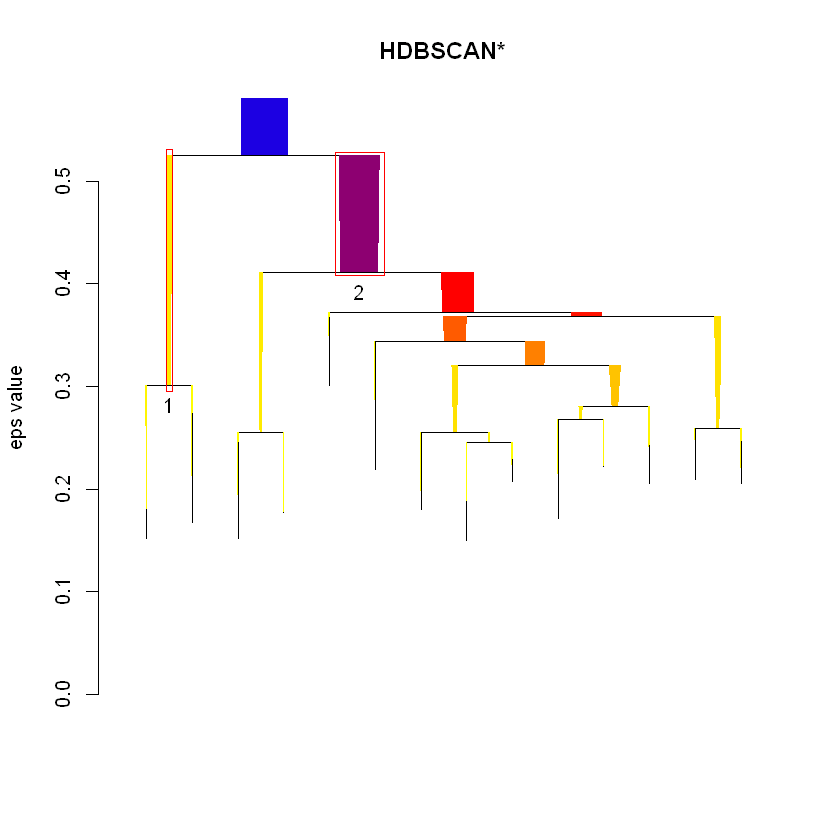

In [18]:
plot(cl, gradient = c("yellow", "orange", "red", "blue"), show_flat = TRUE)

In [19]:
print(cl$cluster_scores)

        1         2 
 95.24161 312.07514 


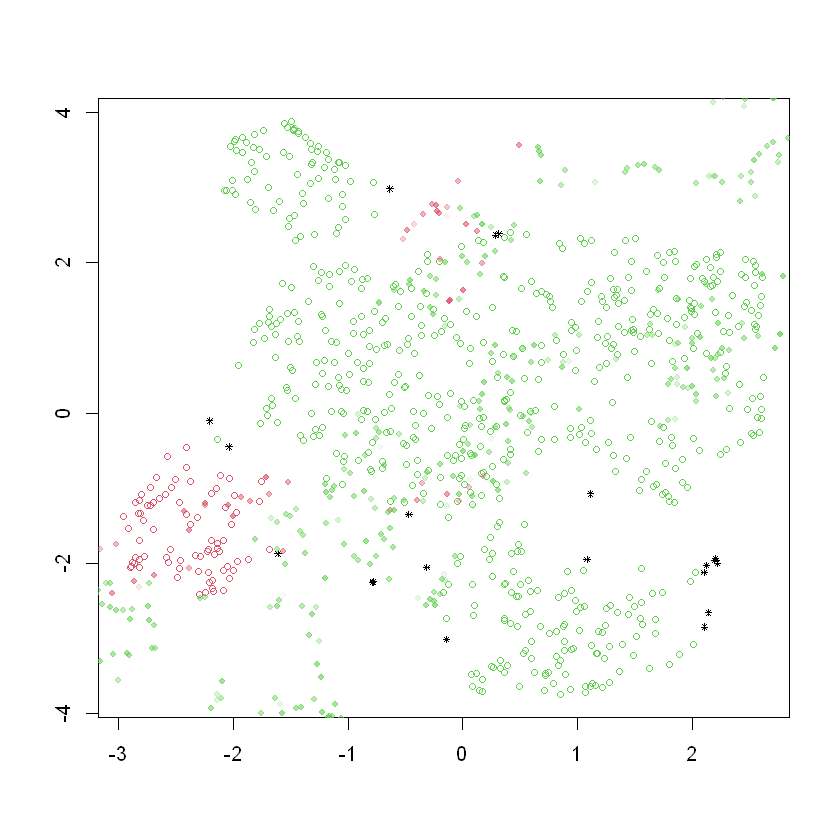

In [20]:
plot(d_analise, col=cl$cluster+1, 
       pch=ifelse(cl$cluster == 0, 8, 1), # Mark noise as star
       cex=ifelse(cl$cluster == 0, 0.5, 0.75), # Decrease size of noise
       xlab=NA, ylab=NA)
colors <- sapply(1:length(cl$cluster), 
                   function(i) adjustcolor(palette()[(cl$cluster+1)[i]], alpha.f = cl$membership_prob[i]))
points(dados2d[,3:4], col=colors, pch=20)

In [21]:
table(dados2d %>% pull(type),cl$cluster)

                         
                            0   1   2
  horizontal-misalignment   7   0 140
  imbalance                 2   0 137
  normal                    2   0  47
  overhang-ball_fault       5  77   6
  underhang-ball_fault      2   0 134
  vertical-misalignment     2   0 148

In [22]:
table(paste(dados2d %>% pull(type), dados2d %>% pull(un)),cl$cluster)

                               
                                 0  1  2
  horizontal-misalignment 1.0mm  2  0 47
  horizontal-misalignment 1.5mm  5  0 44
  horizontal-misalignment 2.0mm  0  0 49
  imbalance 25g                  1  0 46
  imbalance 30g                  0  0 47
  imbalance 35g                  1  0 44
  normal NA                      2  0 47
  overhang-ball_fault 20g        0 24  1
  overhang-ball_fault 35g        2 14  4
  overhang-ball_fault 6g         3 39  1
  underhang-ball_fault 20g       1  0 48
  underhang-ball_fault 35g       0  0 38
  underhang-ball_fault 6g        1  0 48
  vertical-misalignment 1.40mm   0  0 50
  vertical-misalignment 1.78mm   0  0 50
  vertical-misalignment 1.90mm   2  0 48

## Comparação com os dados sem redução da dimensionalidade

In [38]:
cl2 <- hdbscan(dados[,3:dim(dados)[2]], minPts = 6)
cl2

HDBSCAN clustering for 709 objects.
Parameters: minPts = 6
The clustering contains 2 cluster(s) and 61 noise points.

  0   1   2 
 61   6 642 

Available fields: cluster, minPts, coredist, cluster_scores,
                  membership_prob, outlier_scores, hc

In [39]:
table(dados %>% pull(type),cl2$cluster)

                         
                            0   1   2
  horizontal-misalignment   6   1 140
  imbalance                10   3 126
  normal                    2   0  47
  overhang-ball_fault      19   0  69
  underhang-ball_fault     17   0 119
  vertical-misalignment     7   2 141

In [40]:
table(paste(dados %>% pull(type), dados %>% pull(un)),cl2$cluster)

                               
                                 0  1  2
  horizontal-misalignment 1.0mm  2  0 47
  horizontal-misalignment 1.5mm  3  0 46
  horizontal-misalignment 2.0mm  1  1 47
  imbalance 25g                  4  3 40
  imbalance 30g                  2  0 45
  imbalance 35g                  4  0 41
  normal NA                      2  0 47
  overhang-ball_fault 20g        2  0 23
  overhang-ball_fault 35g        6  0 14
  overhang-ball_fault 6g        11  0 32
  underhang-ball_fault 20g       7  0 42
  underhang-ball_fault 35g       3  0 35
  underhang-ball_fault 6g        7  0 42
  vertical-misalignment 1.40mm   3  0 47
  vertical-misalignment 1.78mm   1  1 48
  vertical-misalignment 1.90mm   3  1 46

# Algoritmo K-Means

## Introdução  
O **K-Means** é um algoritmo de aprendizado não supervisionado usado para **agrupamento** (*clustering*). Ele particiona um conjunto de dados em **K clusters** distintos com base na proximidade dos pontos aos centróides, minimizando a variância intra-cluster.

---

## Funcionamento  

1. **Inicialização**:  
   - Escolha o número **K** de clusters desejados.  
   - Inicialize **K centróides** aleatoriamente ou por um método como *k-means++*.

2. **Iteração** (até convergência):  
   - **Passo 1: Atribuição**  
     Atribua cada ponto de dados \( x_i \) ao centróide mais próximo \( C_j \), onde a proximidade é calculada por uma **distância** (geralmente a distância Euclidiana):  
     \[
     d(x_i, C_j) = \| x_i - C_j \|_2^2
     \]
     Cada centróide representa o seu respectivo cluster.

   - **Passo 2: Atualização**  
     Recalcule os centróides como a **média aritmética** dos pontos atribuídos a cada cluster:  
     \[
     C_j = \frac{1}{|S_j|} \sum_{x \in S_j} x
     \]
     Onde \( S_j \) é o conjunto de pontos no cluster \( j \).

3. **Convergência**:  
   - O processo se repete até que os centróides não mudem significativamente ou uma condição de parada seja atingida (número máximo de iterações, por exemplo).  

---

## Fórmulas Matemáticas

O objetivo do algoritmo K-Means é **minimizar a soma dos erros quadráticos dentro dos clusters** (**Within-Cluster Sum of Squares**, WCSS):

\[
\text{WCSS} = \sum_{j=1}^K \sum_{x_i \in S_j} \| x_i - C_j \|^2
\]

Onde:  
- \( K \): número de clusters;  
- \( S_j \): conjunto de pontos atribuídos ao cluster \( j \);  
- \( C_j \): centróide do cluster \( j \).

---

## Vantagens  
- Simples e eficiente para conjuntos de dados grandes.  
- Convergência rápida em prática.  
- Fácil de interpretar e implementar.  

---

## Desvantagens  
- Sensível à inicialização dos centróides.  
- Assume que os clusters são esféricos e de tamanho semelhante.  
- Pode convergir para mínimos locais do WCSS.  
- O valor de \( K \) deve ser escolhido a priori.

---

## Aplicações  
- Compressão de imagens.  
- Segmentação de clientes (*Customer Segmentation*).  
- Agrupamento de documentos e textos.  
- Análise de padrões em grandes conjuntos de dados.

---

## Pseudocódigo  

```text
Entrada: Conjunto de dados X = {x_1, x_2, ..., x_n}, número de clusters K.
Saída: K clusters {C_1, C_2, ..., C_K}.

1. Inicialize K centróides aleatoriamente: C_1, C_2, ..., C_K.
2. Enquanto não convergir (ou atingir limite de iterações):
      a. Para cada ponto x_i em X:
            - Atribua x_i ao cluster com o centróide mais próximo.
      b. Para cada cluster C_j:
            - Recalcule o centróide como a média dos pontos atribuídos ao cluster.
3. Retorne os clusters e centróides finais.


In [26]:
k <- kmeans(d_analise, 16)

In [27]:
table(dados2d %>% pull(type), k$cluster)

                         
                           1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16
  horizontal-misalignment  5  0  0  2  2  0 20  0  0 24 42 29  0 16  5  2
  imbalance               12  0  0 30 15  2  0 70  5  3  0  1  0  0  1  0
  normal                   0  0  0  2  0  0 10  0  0 12  4  4  0  0 17  0
  overhang-ball_fault      0 32 27  3  0  1  0  0  1  0  0  0 22  0  2  0
  underhang-ball_fault    15  0  0 13 12 51  0  0 42  3  0  0  0  0  0  0
  vertical-misalignment   12  0  0 24 10  3  0  1  3 28  0  0  0 48  0 21

In [28]:
table(paste(dados %>% pull(type), dados %>% pull(un)),  k$cluster)

                               
                                 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16
  horizontal-misalignment 1.0mm  0  0  0  0  0  0  9  0  0  0 20 17  0  0  3  0
  horizontal-misalignment 1.5mm  0  0  0  0  0  0 11  0  0  1 22 12  0  1  2  0
  horizontal-misalignment 2.0mm  5  0  0  2  2  0  0  0  0 23  0  0  0 15  0  2
  imbalance 25g                 10  0  0 23  9  0  0  1  1  2  0  0  0  0  1  0
  imbalance 30g                  1  0  0  4  4  1  0 33  3  1  0  0  0  0  0  0
  imbalance 35g                  1  0  0  3  2  1  0 36  1  0  0  1  0  0  0  0
  normal NA                      0  0  0  2  0  0 10  0  0 12  4  4  0  0 17  0
  overhang-ball_fault 20g        0  8 12  0  0  0  0  0  1  0  0  0  4  0  0  0
  overhang-ball_fault 35g        0  5  3  3  0  1  0  0  0  0  0  0  7  0  1  0
  overhang-ball_fault 6g         0 19 12  0  0  0  0  0  0  0  0  0 11  0  1  0
  underhang-ball_fault 20g       4  0  0  5  3 19  0  0 17  1  0  0  0  0  0  0
  underh

## Conclusão  

Os resultados obtidos evidenciam que a **redução de dimensionalidade** pode melhorar de forma significativa o desempenho de algoritmos de aglomeração. No presente estudo, verificou-se que a aplicação do algoritmo **HDBSCAN** nos **dados brutos** resultou na classificação com muitos pontos classificados como *outliers*. Além disso, em relação à normalização dos dados, constatou-se que a normalização pelo **desvio padrão** resultou em uma perda de qualidade no desempenho do HDBSCAN. Por outro lado, a **normalização em relação à média** apresentou uma melhora nos resultados, o que indica uma maior adequação dessa abordagem para os dados analisados.  

Um dos principais desafios identificados é a **definição do número ideal de dimensões** para a execução eficiente do algoritmo. Nesse sentido, métodos baseados em **autoencoders de redes neurais** se destacam por possuírem processos de **otimização de metaparâmetros** integrados, o que oferece uma vantagem em relação a técnicas como **UMAP** ou **t-SNE**, que não incluem essa otimização de forma nativa.  

No que diz respeito aos dados analisados, observou-se uma **clara distinção** entre as classes **overhang-ball_fault** e **underhang-ball_fault** em comparação às demais classes. Contudo, no caso do **funcionamento normal do motor**, não foi identificada uma separação significativa em relação às demais condições. Isso revela uma dificuldade substancial em distinguir o **funcionamento normal** do motor de situações de **desbalanceamento** ou **desalinhamento**. Tal desafio representa um obstáculo importante para as equipes de engenharia no desenvolvimento de um **detector de falhas** eficaz para essa classe específica de mau funcionamento.

Com relação aos algoritmos HDBSCAN e K-means, ambos desempenharam resultados semelhantes, porém o HDBSCAN conseguiu agrupar os pontos da classe normal em um único grupo e distinguir melhor os grupos overhang-ball_fault e underhang-ball.
